## Project 2: House Hunting for Families in King County

Name:Sam Lim

Course: Data Science Full Time

Date: 3/26/21 4:30 pm EST

Instructor: Claude Fried


In [296]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression
import sklearn.metrics as metrics
from random import gauss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from statsmodels.stats import outliers_influence
from sklearn.metrics import mean_absolute_error
import sklearn
sns.set_theme(color_codes=True)

## Business Problem

A realtorship is experiencing an influx of smaller families coming into King County as Microsoft has expanded and hired substantial amount of workers. It is your job to find a home for these families, and many also live alone. 

## Data Observation and Cleaning
### Data Keys
id - unique identified for a house <br>
price- Price is prediction target <br>
bedrooms- Number of Bedrooms/House <br>
bathrooms- Number of bathrooms/bedrooms <br>
sqft_living- Square footage of the home <br>
sqft_lot- Square footage of the lot <br>
floors- Total floors (levels) in house <br>
waterfront - House which has a view to a waterfront <br>
condition - How good the condition is ( Overall ) <br>
grade - overall grade given to the housing unit, based on King County grading system <br>
yr_built - Built Year

## Data Prep and Cleaning

First, unnecessary columns are dropped as well as some rows that contained incorrect data across the independent variables. New data series are created as well. The grade and condition columns are changed to type string so that it is seen as categorical data and not numerical.

In [213]:
kc_data=pd.read_csv('data/kc_house_data.csv')
kc_new=kc_data.drop(columns=['zipcode','date','view','sqft_above','sqft_basement','yr_renovated','lat','long','sqft_living15','sqft_lot15','waterfront'])
kc_new=kc_new.set_index('id')
kc_new['bldg_age']=2021-kc_new['yr_built']


In [ ]:
# kc_new.loc[kc_new['bedrooms']==33]=3 
#seemed to be an error because there were only 1.75 bathrooms and sqft_living was only 1620

# kc_new=kc_new.drop(index=2402100895, axis=0)
#3 beds,baths,sqft_living, etc. everything was 3

# kc_new['bldg_age']=2021-kc_new['yr_built']
# kc_new['grade']=kc_new['grade'].astype('str')         # grade and condition were type int, so needed to be changed
# kc_new['condition']=kc_new['condition'].astype('str') # they are still categorized later
# kc_new['zipcode']=kc_new['zipcode'].astype('str')

In [167]:
kc_new.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built
id,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,3,7,1955
6414100192,538000.0,3,2.25,2570,7242,2.0,3,7,1951
5631500400,180000.0,2,1.00,770,10000,1.0,3,6,1933
2487200875,604000.0,4,3.00,1960,5000,1.0,5,7,1965
1954400510,510000.0,3,2.00,1680,8080,1.0,3,8,1987


### Data Training

In [191]:
X_train, X_test, y_train, y_test = train_test_split(predictors,kc_new['price'], test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17276, 6), (4320, 6), (17276,), (4320,))

In [306]:
lr=LinearRegression()#positive=True)
predictors=kc_new.drop('price',axis=1)
predictors=sm.add_constant(predictors)
# y_train=np.array(y_train).reshape(-1,1)
lr.fit(X_train,y_train)
# predict_ls=fit_lr.predict(predictors)

yhat_train=lr.predict(X_train)
yhat_test=lr.predict(X_test)

train_residuals = yhat_train - y_train
test_residuals = yhat_test - y_test

In [237]:
mse_train = np.sum((y_train-yhat_train)**2)/len(y_train)
mse_test = np.sum((y_test-yhat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: 59755332738.083984
Test Mean Squarred Error: 58952013622.75533


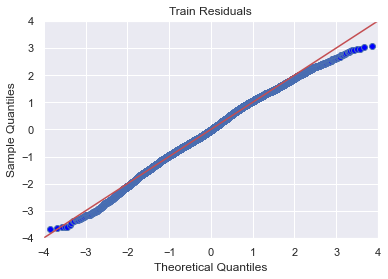

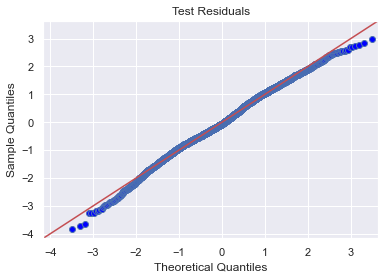

In [193]:
sm.graphics.qqplot(train_residuals,dist=stats.norm,line='45',fit=True)
plt.title('Train Residuals')
sm.graphics.qqplot(test_residuals,dist=stats.norm,line='45',fit=True)
plt.title('Test Residuals')
plt.show()

We can observe that the difference between the test and train MSE are not too different, and that the residuals fit well on the Q-Q plot. 

### Data Modeling

After creating a new database, used the OLS function to find the coefficients. 

In [215]:
outcome = 'price'
predictors = kc_new.drop(['price'], axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
print(formula)

price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+condition+grade+yr_built+bldg_age


In [216]:
model = ols(formula=formula, data=kc_new).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     4363.
Date:                Mon, 29 Mar 2021   Prob (F-statistic):               0.00
Time:                        20:58:21   Log-Likelihood:            -2.9700e+05
No. Observations:               21597   AIC:                         5.940e+05
Df Residuals:                   21588   BIC:                         5.941e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.4482      0.032     44.960      0.000       1.385       1.511
bedrooms    -4.915e+04   2123.053    -23.151      0.000   -5.33e+04    -4.5e+04
bathrooms    5.286e+04   3587.694     14.734      0.000    4.58e+04    5.99e+04
sqft_living   187.4021      3.421     54.784      0.000     180.697     194.107
sqft_lot       -0.2459      0.038     -6.439      0.000      -0.321      -0.171
floors       2.128e+04   3592.816      5.922      0.000    1.42e+04    2.83e+04
condition    1.962e+04   2583.883      7.593      0.000    1.46e+04    2.47e+04
grade        1.311e+05   2238.758     58.577      0.000    1.27e+05    1.36e+05
yr_built     -541.9966      8.997    -60.240      0.000    -559.632    -524.361
bldg_age     3468.7420     66.559     52.115      0.000    3338.282    3599.202
==============================================================================
Omnibus:                    17302.265   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1207162.645
Skew:                           3.353   Prob(JB):                         0.00
Kurtosis:                      39.007   Cond. No.                     2.45e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.99e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

While the R-squared value seemed to show potential, variables such as the yr_built and floors did not seem necessary as well. At this point, I had also noticed that the coefficients were negative for bedrooms and sq. ft lot; however, since I couldn't do much about it, I decided to proceed. 

In [217]:
outcome = 'price'
predictors = kc_new.drop(['price','yr_built','floors'], axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
print(formula)

price~bedrooms+bathrooms+sqft_living+sqft_lot+condition+grade+bldg_age


In [218]:
model = ols(formula=formula, data=kc_new).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     4974.
Date:                Mon, 29 Mar 2021   Prob (F-statistic):               0.00
Time:                        20:58:25   Log-Likelihood:            -2.9702e+05
No. Observations:               21597   AIC:                         5.941e+05
Df Residuals:                   21589   BIC:                         5.941e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.076e+06   1.79e+04    -60.126      0.000   -1.11e+06   -1.04e+06
bedrooms     -4.96e+04   2123.402    -23.356      0.000   -5.38e+04   -4.54e+04
bathrooms    5.798e+04   3484.667     16.639      0.000    5.12e+04    6.48e+04
sqft_living   185.7714      3.412     54.441      0.000     179.083     192.460
sqft_lot       -0.2600      0.038     -6.815      0.000      -0.335      -0.185
condition     1.76e+04   2563.288      6.866      0.000    1.26e+04    2.26e+04
grade        1.334e+05   2206.957     60.457      0.000    1.29e+05    1.38e+05
bldg_age     3925.1267     67.697     57.981      0.000    3792.437    4057.817
==============================================================================
Omnibus:                    17191.902   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1180961.717
Skew:                           3.324   Prob(JB):                         0.00
Kurtosis:                      38.611   Cond. No.                     5.14e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

After observing that the R-squared value seemed to represent a statisticlaly significant model, I checked to see if it passed the 3 assumptions of linear regression. The p-values of the independent variables also seemed to show homoscedesticity, but the model had high condition number, which indicated strong multicollinearity (or other numerical problems). 

F:\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-178-b90871122cdb>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_beds.set_yticklabels(kc_new['price'])


[Text(0.5, 0, 'Number of Bedrooms'),
 Text(0, 0.5, 'Price'),
 Text(0.5, 1.0, 'Relationship between Price and the Number of Bedrooms')]

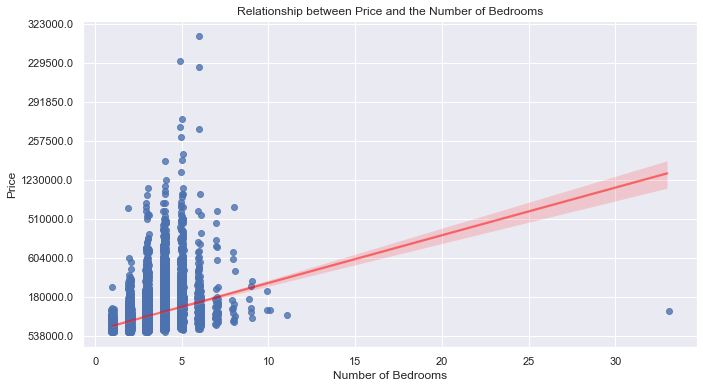

In [178]:
data=kc_new
price_unlog=round(np.exp(data['price']),2)
plot=plt.figure(figsize=(11,6))
ax_beds=sns.regplot(x='bedrooms',y='price',data=data,x_jitter=.1, line_kws={'color':'red','alpha':.5})
ax_beds.set_yticklabels(kc_new['price'])
ax_beds.set(xlabel='Number of Bedrooms',ylabel='Price',title='Relationship between Price and the Number of Bedrooms')

First detected an outlier, a house with more than 30 rooms

<ipython-input-179-1c96254ebd3e>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_baths.set_yticklabels(kc_new['price'])


[Text(0.5, 0, 'Number of Bathrooms'),
 Text(0, 0.5, 'Price'),
 Text(0.5, 1.0, 'Relationship between Price and the Number of Bathrooms')]

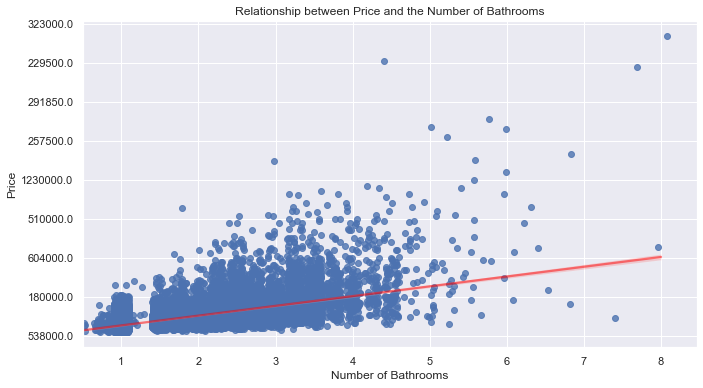

In [179]:
plot=plt.figure(figsize=(11,6))
ax_baths=sns.regplot(x='bathrooms',y='price',data=data,x_jitter=.1, line_kws={'color':'red','alpha':.5})
ax_baths.set_yticklabels(kc_new['price'])
ax_baths.set(xlabel='Number of Bathrooms',ylabel='Price',title='Relationship between Price and the Number of Bathrooms')

<ipython-input-183-8fa857cd177f>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_living.set_yticklabels(kc_new['price'])
<ipython-input-183-8fa857cd177f>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_living.set_xticklabels(data2['sqft_living'])


[Text(0.5, 0, 'Size of Living Space in Sq. ft.'),
 Text(0, 0.5, 'Price'),
 Text(0.5, 1.0, 'Relationship between Price and the Sq. ft of Living Space')]

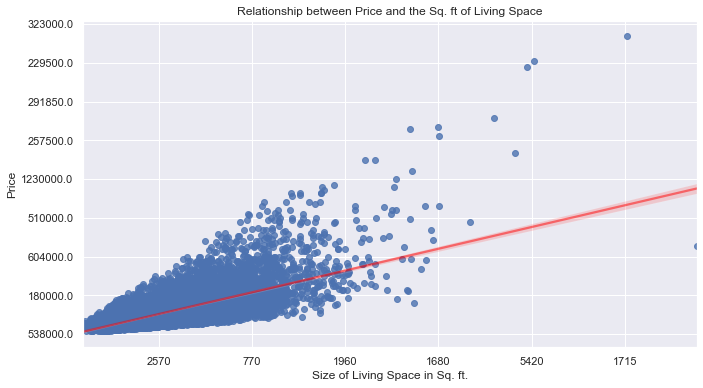

In [183]:
data2=kc_new
plot=plt.figure(figsize=(11,6))
ax_living=sns.regplot(x=data2['sqft_living'],y='price',data=data2,x_jitter=.1, line_kws={'color':'red','alpha':.5})
ax_living.set_yticklabels(kc_new['price'])
ax_living.set_xticklabels(data2['sqft_living'])
ax_living.set(xlabel='Size of Living Space in Sq. ft.',ylabel='Price',title='Relationship between Price and the Sq. ft of Living Space')

<ipython-input-187-83ca46462611>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_lot.set_yticklabels(kc_new['price'])
<ipython-input-187-83ca46462611>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_lot.set_xticklabels(data2['sqft_lot'].sort_values())


[Text(0.5, 0, 'Size of Lot Space'),
 Text(0, 0.5, 'Price'),
 Text(0.5, 1.0, 'Relationship between Price and the Sq. ft of Lot Space')]

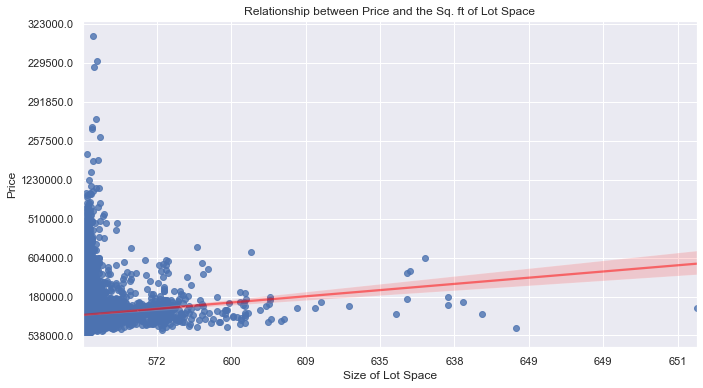

In [187]:
plot=plt.figure(figsize=(11,6))
data2=kc_new
ax_lot=sns.regplot(x='sqft_lot',y='price',data=data2,x_jitter=.1, line_kws={'color':'red','alpha':.5})
ax_lot.set_yticklabels(kc_new['price'])
ax_lot.set_xticklabels(data2['sqft_lot'].sort_values())
ax_lot.set(xlabel='Size of Lot Space',ylabel='Price',title='Relationship between Price and the Sq. ft of Lot Space')

First located the house with more than 33 rooms and found that it only had 3 bathrooms, and the house was not big enough to have that many rooms, and while checking to see if there were any other errors, found a house with 3 sq. ft of living space, lot, bedrooms, and etc. Decided to drop the entire row. 

In [219]:
kc_new.loc[kc_new['bedrooms']==33]=3 
# seemed to be an error because there were only 1.75 bathrooms and sqft_living was only 1620
kc_new=kc_new.drop(index=2402100895, axis=0)
# 3 beds,baths,sqft_living, etc. everything was 3

### Logarithmic Scaling

The data had to be normalized because the independent variables coefficients were too large. The coefficients were too large and the values were too large (sqft living and lot, price). In order to normalize the data, I created a new database that contained log-scaled values of the original the original data. Not all independent variables were logarithmically scaled, but the dependent variable, price were also log-scaled. This helped normalize the data. Before log scaling and normalizing the values, our data shows no sign of linearity nor homoscedesticity. The regressions of the variables did fit the Q-Q plot; failing to meet 2 of the 3 assumptions of linear regression.



After trying to use logged versions, i couldnt so i had to scale them, but after i did, i had to unscale the price because the price coudlnt be in the negatives lol

In [241]:
logsqft_living=np.log(kc_new['sqft_living'])
logsqft_lot=np.log(kc_new['sqft_lot'])
log_age=np.log(kc_new['bldg_age'])
log_price=np.log(kc_new['price'])

# Creating new database
kc_fin=pd.DataFrame([])
# transferring over varible values
kc_fin['bedrooms']=kc_new['bedrooms']
kc_fin['bathrooms']=kc_new['bathrooms']
kc_fin['sqft_living']=logsqft_living
kc_fin['sqft_lot']=logsqft_lot
kc_fin['condition']=kc_new['condition']
kc_fin['grade']=kc_new['grade']
kc_fin['bldg_age']=log_age


kc_fin=pd.concat([log_price, kc_fin],axis=1)

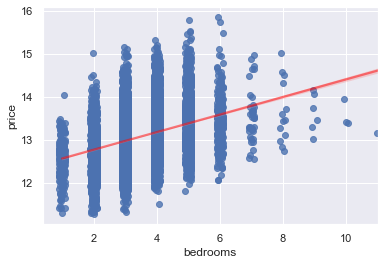

In [222]:
data=kc_fin
ax2_beds=sns.regplot(x='bedrooms',y='price',data=data,x_jitter=.1, line_kws={'color':'red','alpha':.5})

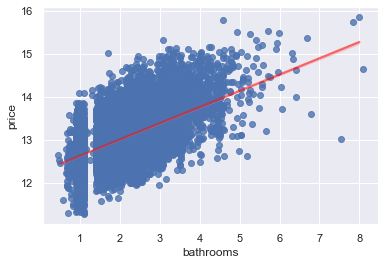

In [223]:
ax2_baths=sns.regplot(x='bathrooms',y='price',data=data,x_jitter=.1, line_kws={'color':'red','alpha':.5})

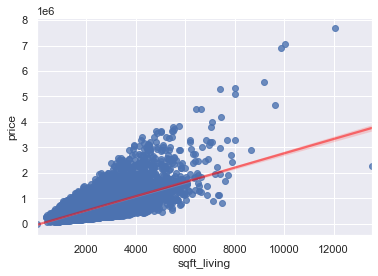

In [224]:
ax2_living=sns.regplot(x=data2['sqft_living'],y='price',data=data2,x_jitter=.1, line_kws={'color':'red','alpha':.5})

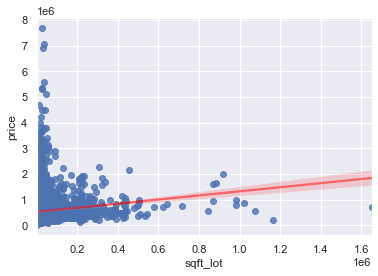

In [225]:
ax2_lot=sns.regplot(x='sqft_lot',y='price',data=data2,x_jitter=.1, line_kws={'color':'red','alpha':.5})

The values were log transformed, but were not scaled.

In [249]:
logsqft_living=np.log(kc_new['sqft_living'])
logsqft_lot=np.log(kc_new['sqft_lot'])
log_age=np.log(kc_new['bldg_age'])
log_price=np.log(kc_new['price'])
# Scaling logged values
scaled_living=(logsqft_living-np.mean(logsqft_living))/np.sqrt(np.var(logsqft_living))
scaled_lot=(logsqft_lot-np.mean(logsqft_lot))/np.sqrt(np.var(logsqft_lot))
scaled_age=(log_age-np.mean(log_age))/np.sqrt(np.var(log_age))

kc_fin['bedrooms']=kc_new['bedrooms']
kc_fin['bathrooms']=kc_new['bathrooms']
kc_fin['sqft_living']=scaled_living
kc_fin['sqft_lot']=scaled_lot
kc_fin['condition']=kc_new['condition']
kc_fin['grade']=kc_new['grade']
kc_fin['bldg_age']=scaled_age

kc_fin=pd.concat([log_price, kc_fin],axis=1)

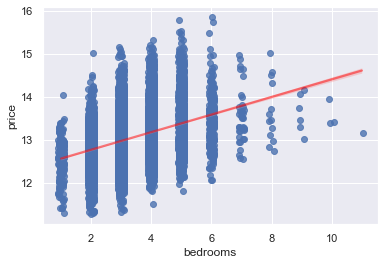

In [243]:
data=kc_fin
ax2_beds=sns.regplot(x='bedrooms',y='price',data=data,x_jitter=.1, line_kws={'color':'red','alpha':.5})

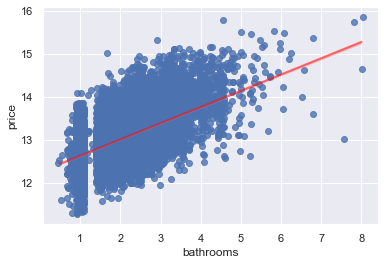

In [244]:
ax2_baths=sns.regplot(x='bathrooms',y='price',data=data,x_jitter=.1, line_kws={'color':'red','alpha':.5})

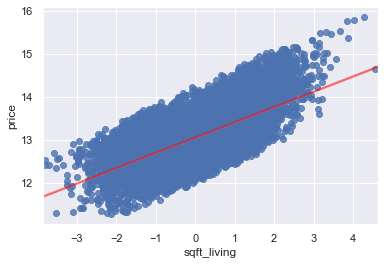

In [245]:
ax2_living=sns.regplot(x=data['sqft_living'],y='price',data=data,x_jitter=.1, line_kws={'color':'red','alpha':.5})

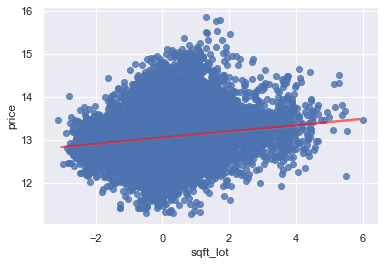

In [246]:
ax2_lot=sns.regplot(x='sqft_lot',y='price',data=data,x_jitter=.1, line_kws={'color':'red','alpha':.5})

After log transforming and scaling the transformed values, the model showed homoscedesticity except in the sqft_lot. This is because many apartments/condos do not have much lot space that is not used for living space. Since many of these apartments/condos are more expensive, there is a much wider variation in price where the sqft lot is near 0.

In [247]:
outcome = 'price'
predictors = kc_fin.drop(['price'], axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
print(formula)

price~bedrooms+bathrooms+sqft_living+sqft_lot+condition+grade+bldg_age


In [248]:
model = ols(formula=formula, data=kc_fin).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     4888.
Date:                Mon, 29 Mar 2021   Prob (F-statistic):               0.00
Time:                        21:14:16   Log-Likelihood:                -6536.1
No. Observations:               21596   AIC:                         1.309e+04
Df Residuals:                   21588   BIC:                         1.315e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      11.1141      0.031    356.045      0.000      11.053      11.175
bedrooms       -0.0520      0.003    -15.655      0.000      -0.059      -0.046
bathrooms       0.0772      0.005     15.121      0.000       0.067       0.087
sqft_living     0.2076      0.005     43.584      0.000       0.198       0.217
sqft_lot       -0.0657      0.002    -26.443      0.000      -0.071      -0.061
condition       0.0430      0.004     11.479      0.000       0.036       0.050
grade           0.2350      0.003     76.396      0.000       0.229       0.241
bldg_age        0.1463      0.003     49.405      0.000       0.140       0.152
==============================================================================
Omnibus:                       56.412   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.993
Skew:                           0.031   Prob(JB):                     3.84e-16
Kurtosis:                       3.274   Cond. No.                         133.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model seems to be improving as multicollinearity does not seem to be an issue. While the data cannot be reproduced again for now, condition and/or grade had negative coefficients, meaning that if the grade or the condition of a house was better, it would be cheaper. Later I found out that these types of variables should be set as categorical variables.

In [254]:
logsqft_living=np.log(kc_new['sqft_living'])
logsqft_lot=np.log(kc_new['sqft_lot'])
log_age=np.log(kc_new['bldg_age'])
log_price=np.log(kc_new['price'])
# Scaling logged values
scaled_living=(logsqft_living-np.mean(logsqft_living))/np.sqrt(np.var(logsqft_living))
scaled_lot=(logsqft_lot-np.mean(logsqft_lot))/np.sqrt(np.var(logsqft_lot))
scaled_age=(log_age-np.mean(log_age))/np.sqrt(np.var(log_age))

kc_fin=pd.DataFrame([])

kc_fin['bedrooms']=kc_new['bedrooms']
kc_fin['bathrooms']=kc_new['bathrooms']
kc_fin['sqft_living']=scaled_living
kc_fin['sqft_lot']=scaled_lot
kc_fin['bldg_age']=scaled_age

cond_dummies=pd.get_dummies(kc_new['condition'],prefix='cnd',drop_first=True).astype('category')
grade_dummies=pd.get_dummies(kc_new['grade'],prefix='grade',drop_first=True).astype('category')

kc_fin=pd.concat([log_price, kc_fin, cond_dummies, grade_dummies],axis=1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,bldg_age,cnd_2,cnd_3,cnd_4,cnd_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
id,,,,,,,,,,,,,,,,,,,,
7129300520,12.309982,3,1.00,-1.125577,-0.388446,0.689504,0,1,0,0,0,0,0,1,0,0,0,0,0,0
6414100192,13.195614,3,2.25,0.709431,-0.113256,0.771426,0,1,0,0,0,0,0,1,0,0,0,0,0,0
5631500400,12.100712,2,1.00,-2.131918,0.244461,1.090038,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2487200875,13.311329,4,3.00,0.070657,-0.523930,0.460747,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1954400510,13.142166,3,2.00,-0.292744,0.008125,-0.233989,0,1,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,12.793859,3,2.50,-0.513225,-2.171614,-1.683985,0,1,0,0,0,0,0,0,1,0,0,0,0,0
6600060120,12.899220,4,2.50,0.457991,-0.356917,-2.434420,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1523300141,12.904459,2,0.75,-1.469084,-1.975398,-1.683985,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [255]:
outcome = 'price'
predictors = kc_fin.drop(['price'], axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
print(formula)
model = ols(formula=formula, data=kc_fin).fit()
model.summary()

price~bedrooms+bathrooms+sqft_living+sqft_lot+bldg_age+cnd_2+cnd_3+cnd_4+cnd_5+grade_4+grade_5+grade_6+grade_7+grade_8+grade_9+grade_10+grade_11+grade_12+grade_13


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     1829.
Date:                Mon, 29 Mar 2021   Prob (F-statistic):               0.00
Time:                        21:21:31   Log-Likelihood:                -6428.5
No. Observations:               21596   AIC:                         1.290e+04
Df Residuals:                   21576   BIC:                         1.306e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        12.8057      0.332     38.535      0.000      12.154      13.457
cnd_2[T.1]       -0.0779      0.066     -1.186      0.236      -0.207       0.051
cnd_3[T.1]        0.0476      0.061      0.780      0.435      -0.072       0.167
cnd_4[T.1]        0.0702      0.061      1.149      0.251      -0.050       0.190
cnd_5[T.1]        0.1551      0.061      2.523      0.012       0.035       0.276
grade_4[T.1]     -0.2688      0.332     -0.809      0.418      -0.920       0.382
grade_5[T.1]     -0.2851      0.327     -0.872      0.383      -0.926       0.356
grade_6[T.1]     -0.1618      0.326     -0.496      0.620      -0.801       0.478
grade_7[T.1]      0.0213      0.326      0.065      0.948      -0.618       0.661
grade_8[T.1]      0.2545      0.326      0.780      0.436      -0.385       0.894
grade_9[T.1]      0.5361      0.327      1.642      0.101      -0.104       1.176
grade_10[T.1]     0.7550      0.327      2.311      0.021       0.115       1.395
grade_11[T.1]     0.9813      0.327      3.001      0.003       0.340       1.622
grade_12[T.1]     1.2590      0.329      3.832      0.000       0.615       1.903
grade_13[T.1]     1.4842      0.339      4.376      0.000       0.819       2.149
bedrooms         -0.0487      0.003    -14.671      0.000      -0.055      -0.042
bathrooms         0.0735      0.005     14.276      0.000       0.063       0.084
sqft_living       0.2101      0.005     43.957      0.000       0.201       0.219
sqft_lot         -0.0688      0.003    -27.194      0.000      -0.074      -0.064
bldg_age          0.1465      0.003     48.427      0.000       0.141       0.152
==============================================================================
Omnibus:                       33.919   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.919
Skew:                           0.009   Prob(JB):                     1.30e-09
Kurtosis:                       3.213   Cond. No.                     2.11e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

I saw that the p-values were generally higher for the grade variable compared to the condition variable, and the building age variable did not seem to affect the price. These two variables were removed.

In [257]:
kc_fin=pd.DataFrame([])

kc_fin['bedrooms']=kc_new['bedrooms']
kc_fin['bathrooms']=kc_new['bathrooms']
kc_fin['sqft_living']=scaled_living
kc_fin['sqft_lot']=scaled_lot

cond_dummies=pd.get_dummies(kc_new['condition'],prefix='cnd',drop_first=True).astype('category')

kc_fin=pd.concat([log_price, kc_fin, cond_dummies],axis=1)

outcome = 'price'
predictors = kc_fin.drop(['price'], axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
print(formula)
model = ols(formula=formula, data=kc_fin).fit()
model.summary()

price~bedrooms+bathrooms+sqft_living+sqft_lot+cnd_2+cnd_3+cnd_4+cnd_5


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     2546.
Date:                Mon, 29 Mar 2021   Prob (F-statistic):               0.00
Time:                        21:25:55   Log-Likelihood:                -9615.8
No. Observations:               21596   AIC:                         1.925e+04
Df Residuals:                   21587   BIC:                         1.932e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      13.1479      0.072    182.727      0.000      13.007      13.289
cnd_2[T.1]     -0.0770      0.076     -1.015      0.310      -0.226       0.072
cnd_3[T.1]      0.0368      0.070      0.523      0.601      -0.101       0.175
cnd_4[T.1]      0.1021      0.070      1.451      0.147      -0.036       0.240
cnd_5[T.1]      0.2094      0.071      2.955      0.003       0.071       0.348
bedrooms       -0.0883      0.004    -23.726      0.000      -0.096      -0.081
bathrooms       0.0621      0.005     11.484      0.000       0.051       0.073
sqft_living     0.3869      0.005     82.139      0.000       0.378       0.396
sqft_lot       -0.0460      0.003    -16.218      0.000      -0.052      -0.040
==============================================================================
Omnibus:                       94.066   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.154
Skew:                           0.148   Prob(JB):                     5.91e-21
Kurtosis:                       2.876   Cond. No.                         263.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


## Data Selection

Because the majority of the clients are small to mid-size families, houses with more than 5 bedrooms and houses with more than 4 bathrooms were dropped. This also helped with the linear regression model as the before-mentioned houses tended to be outliers

In [258]:
kc_fin2=kc_fin.drop(index=kc_fin.loc[kc_fin['bedrooms']>5].index.append(kc_fin.loc[kc_fin['bathrooms']>4].index))
kc_fin2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,cnd_2,cnd_3,cnd_4,cnd_5
id,,,,,,,,,
7129300520,12.309982,3,1.00,-1.125577,-0.388446,0,1,0,0
6414100192,13.195614,3,2.25,0.709431,-0.113256,0,1,0,0
5631500400,12.100712,2,1.00,-2.131918,0.244461,0,1,0,0
2487200875,13.311329,4,3.00,0.070657,-0.523930,0,0,0,1
1954400510,13.142166,3,2.00,-0.292744,0.008125,0,1,0,0


In [259]:
kc_fin2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21061 entries, 7129300520 to 1523300157
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   price        21061 non-null  float64 
 1   bedrooms     21061 non-null  int64   
 2   bathrooms    21061 non-null  float64 
 3   sqft_living  21061 non-null  float64 
 4   sqft_lot     21061 non-null  float64 
 5   cnd_2        21061 non-null  category
 6   cnd_3        21061 non-null  category
 7   cnd_4        21061 non-null  category
 8   cnd_5        21061 non-null  category
dtypes: category(4), float64(4), int64(1)
memory usage: 1.0 MB


After cleaning, transforming, and selecting the data I needed, I constructed an OLS model that had scaled, normalized data with correct data types and did not have much multicollinearity issue other than in the categorical variables.

In [137]:
outcome = 'price'
predictors = kc_fin2.drop(['price','zipcode'], axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
print(formula)

price~bedrooms+bathrooms+sqft_living+sqft_lot+cnd_2+cnd_3+cnd_4+cnd_5


In [138]:
model = ols(formula=formula, data=kc_fin2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     2253.
Date:                Mon, 29 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:50:33   Log-Likelihood:                -9178.8
No. Observations:               21061   AIC:                         1.838e+04
Df Residuals:                   21052   BIC:                         1.845e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      13.2128      0.073    181.587      0.000      13.070      13.355
cnd_2[T.1]     -0.0868      0.076     -1.136      0.256      -0.237       0.063
cnd_3[T.1]      0.0444      0.071      0.626      0.531      -0.095       0.183
cnd_4[T.1]      0.1066      0.071      1.501      0.133      -0.033       0.246
cnd_5[T.1]      0.2132      0.071      2.984      0.003       0.073       0.353
bedrooms       -0.0968      0.004    -23.666      0.000      -0.105      -0.089
bathrooms       0.0391      0.006      6.785      0.000       0.028       0.050
sqft_living     0.3929      0.005     81.695      0.000       0.384       0.402
sqft_lot       -0.0485      0.003    -16.956      0.000      -0.054      -0.043
==============================================================================
Omnibus:                       68.943   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.132
Skew:                           0.127   Prob(JB):                     1.60e-15
Kurtosis:                       2.887   Cond. No.                         259.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Zipcode
<br>
While trying to determine what other factors could play into the house pricing other than the house features themselves, I realized that location mattered greatly. It was an outside variable that was able to provide me with data representing of designated groupings of the locations of the houses. 

In [268]:
kc_new=kc_data.drop(columns=['date','view','sqft_above','sqft_basement','yr_renovated','lat','long','sqft_living15','sqft_lot15','waterfront'])
kc_new['zipcode']=kc_new['zipcode'].astype('str')
kc_new=kc_new.set_index('id')
kc_new

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode
id,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,3,7,1955,98178
6414100192,538000.0,3,2.25,2570,7242,2.0,3,7,1951,98125
5631500400,180000.0,2,1.00,770,10000,1.0,3,6,1933,98028
2487200875,604000.0,4,3.00,1960,5000,1.0,5,7,1965,98136
1954400510,510000.0,3,2.00,1680,8080,1.0,3,8,1987,98074
...,...,...,...,...,...,...,...,...,...,...
263000018,360000.0,3,2.50,1530,1131,3.0,3,8,2009,98103
6600060120,400000.0,4,2.50,2310,5813,2.0,3,8,2014,98146
1523300141,402101.0,2,0.75,1020,1350,2.0,3,7,2009,98144


In [283]:
logsqft_living=np.log(kc_new['sqft_living'])
logsqft_lot=np.log(kc_new['sqft_lot'])
log_price=np.log(kc_new['price'])

# Scaling logged values
scaled_living=(logsqft_living-np.mean(logsqft_living))/np.sqrt(np.var(logsqft_living))
scaled_lot=(logsqft_lot-np.mean(logsqft_lot))/np.sqrt(np.var(logsqft_lot))

kc_fin=pd.DataFrame([])

kc_fin['bedrooms']=kc_new['bedrooms']
kc_fin['bathrooms']=kc_new['bathrooms']
kc_fin['sqft_living']=scaled_living
kc_fin['sqft_lot']=scaled_lot
kc_fin['zipcode']=kc_new['zipcode'].astype('str')

cond_dummies=pd.get_dummies(kc_new['condition'],prefix='cnd',drop_first=True).astype('category')
# zip_dummies=pd.get_dummies(kc_new['zipcode'],prefix='zip',drop_first=True).astype('category')


kc_fin=pd.concat([log_price, kc_fin, cond_dummies],axis=1)

In [284]:
kc_fin2=kc_fin.drop(index=kc_fin.loc[kc_fin['bedrooms']>5].index.append(kc_fin.loc[kc_fin['bathrooms']>4].index))
kc_fin2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,zipcode,cnd_2,cnd_3,cnd_4,cnd_5
id,,,,,,,,,,
7129300520,12.309982,3,1.00,-1.125582,-0.388439,98178,0,1,0,0
6414100192,13.195614,3,2.25,0.709463,-0.113243,98125,0,1,0,0
5631500400,12.100712,2,1.00,-2.131943,0.244481,98028,0,1,0,0
2487200875,13.311329,4,3.00,0.070676,-0.523926,98136,0,0,0,1
1954400510,13.142166,3,2.00,-0.292732,0.008140,98074,0,1,0,0


In [285]:
outcome = 'price'
predictors = kc_fin2.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

In [286]:
model_fin = ols(formula=formula, data=kc_fin2).fit()
model_fin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     1318.
Date:                Mon, 29 Mar 2021   Prob (F-statistic):               0.00
Time:                        22:11:06   Log-Likelihood:                 2886.7
No. Observations:               21061   AIC:                            -5617.
Df Residuals:                   20983   BIC:                            -4997.
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           12.2448      0.043    285.328      0.000      12.161      12.329
zipcode[T.98002]    -0.0167      0.019     -0.881      0.378      -0.054       0.020
zipcode[T.98003]     0.0471      0.017      2.777      0.005       0.014       0.080
zipcode[T.98004]     1.2340      0.017     74.069      0.000       1.201       1.267
zipcode[T.98005]     0.8073      0.020     40.067      0.000       0.768       0.847
zipcode[T.98006]     0.7722      0.015     51.673      0.000       0.743       0.801
zipcode[T.98007]     0.7153      0.022     33.201      0.000       0.673       0.758
zipcode[T.98008]     0.7274      0.017     42.815      0.000       0.694       0.761
zipcode[T.98010]     0.2264      0.024      9.409      0.000       0.179       0.274
zipcode[T.98011]     0.4667      0.019     24.675      0.000       0.430       0.504
zipcode[T.98014]     0.2561      0.022     11.436      0.000       0.212       0.300
zipcode[T.98019]     0.2944      0.019     15.448      0.000       0.257       0.332
zipcode[T.98022]     0.0737      0.018      4.116      0.000       0.039       0.109
zipcode[T.98023]     0.0056      0.015      0.386      0.700      -0.023       0.034
zipcode[T.98024]     0.3936      0.027     14.564      0.000       0.341       0.447
zipcode[T.98027]     0.5536      0.015     35.949      0.000       0.523       0.584
zipcode[T.98028]     0.4364      0.017     25.840      0.000       0.403       0.469
zipcode[T.98029]     0.6822      0.016     41.421      0.000       0.650       0.715
zipcode[T.98030]     0.0590      0.017      3.394      0.001       0.025       0.093
zipcode[T.98031]     0.0792      0.017      4.649      0.000       0.046       0.113
zipcode[T.98032]    -0.0004      0.022     -0.018      0.985      -0.044       0.043
zipcode[T.98033]     0.8551      0.015     56.094      0.000       0.825       0.885
zipcode[T.98034]     0.5755      0.014     39.881      0.000       0.547       0.604
zipcode[T.98038]     0.1687      0.014     11.899      0.000       0.141       0.197
zipcode[T.98039]     1.4422      0.035     40.846      0.000       1.373       1.511
zipcode[T.98040]     1.0387      0.017     59.382      0.000       1.004       1.073
zipcode[T.98042]     0.0782      0.014      5.436      0.000       0.050       0.106
zipcode[T.98045]     0.3231      0.018     17.744      0.000       0.287       0.359
zipcode[T.98052]     0.6999      0.014     48.895      0.000       0.672       0.728
zipcode[T.98053]     0.6146      0.016     39.640      0.000       0.584       0.645
zipcode[T.98055]     0.1638      0.017      9.540      0.000       0.130       0.197
zipcode[T.98056]     0.3588      0.015     23.302      0.000       0.329       0.389
zipcode[T.98058]     0.1825      0.015     12.196      0.000       0.153       0.212
zipcode[T.98059]     0.

<br>
Creating an unlogged version of the data after unwanted houses were dropped to un-log/un-normalize values to represent real-world values. 

In [287]:
kc_new2=kc_new.copy()
kc_new2=kc_new2.drop(index=kc_new2.loc[kc_new2['bedrooms']>5].index.append(kc_new2.loc[kc_new2['bathrooms']>4].index))
kc_new2

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode
id,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,3,7,1955,98178
6414100192,538000.0,3,2.25,2570,7242,2.0,3,7,1951,98125
5631500400,180000.0,2,1.00,770,10000,1.0,3,6,1933,98028
2487200875,604000.0,4,3.00,1960,5000,1.0,5,7,1965,98136
1954400510,510000.0,3,2.00,1680,8080,1.0,3,8,1987,98074
...,...,...,...,...,...,...,...,...,...,...
263000018,360000.0,3,2.50,1530,1131,3.0,3,8,2009,98103
6600060120,400000.0,4,2.50,2310,5813,2.0,3,8,2014,98146
1523300141,402101.0,2,0.75,1020,1350,2.0,3,7,2009,98144


In [300]:
kc_unlog=pd.DataFrame([])
kc_unlog['bedrooms']=kc_new2['bedrooms']
kc_unlog['bathrooms']=kc_new2['bathrooms']
kc_unlog['living']=kc_new2['sqft_living']
kc_unlog['lot']=kc_new2['sqft_lot']
kc_unlog['price_sqft_living']=kc_new2['price']/kc_new2['sqft_living']
kc_unlog['price_sqft_lot']=kc_new2['price']/kc_new2['sqft_lot']
# Shows how much each sq. ft of living space is

zip_dummies=pd.get_dummies(kc_new2['zipcode'],prefix='zip',drop_first=True).astype('category')
cond_dummies=pd.get_dummies(kc_new2['condition'],prefix='cnd',drop_first=True).astype('category')

price=kc_new2['price']

kc_unlog=pd.concat([price,kc_unlog,zip_dummies,cond_dummies],axis=1)

In [301]:
kc_unlog

,price,bedrooms,bathrooms,living,lot,price_sqft_living,price_sqft_lot,zip_98002,zip_98003,zip_98004,...,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,cnd_2,cnd_3,cnd_4,cnd_5
id,,,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,188.050847,39.274336,0,0,0,...,0,0,1,0,0,0,0,1,0,0
6414100192,538000.0,3,2.25,2570,7242,209.338521,74.288870,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5631500400,180000.0,2,1.00,770,10000,233.766234,18.000000,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2487200875,604000.0,4,3.00,1960,5000,308.163265,120.800000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1954400510,510000.0,3,2.00,1680,8080,303.571429,63.118812,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,360000.0,3,2.50,1530,1131,235.294118,318.302387,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6600060120,400000.0,4,2.50,2310,5813,173.160173,68.811285,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1523300141,402101.0,2,0.75,1020,1350,394.216667,297.852593,0,0,0,...,0,0,0,0,0,0,0,1,0,0


<ipython-input-302-44b7a1ab731d>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  zip_price.set_yticklabels(labels=round(price_by_zipcode['price'].sort_values(),2))


[Text(0.5, 1.0, 'Average House Price by Zipcode'),
 Text(0.5, 0, 'Zipcode'),
 Text(0, 0.5, 'Price')]

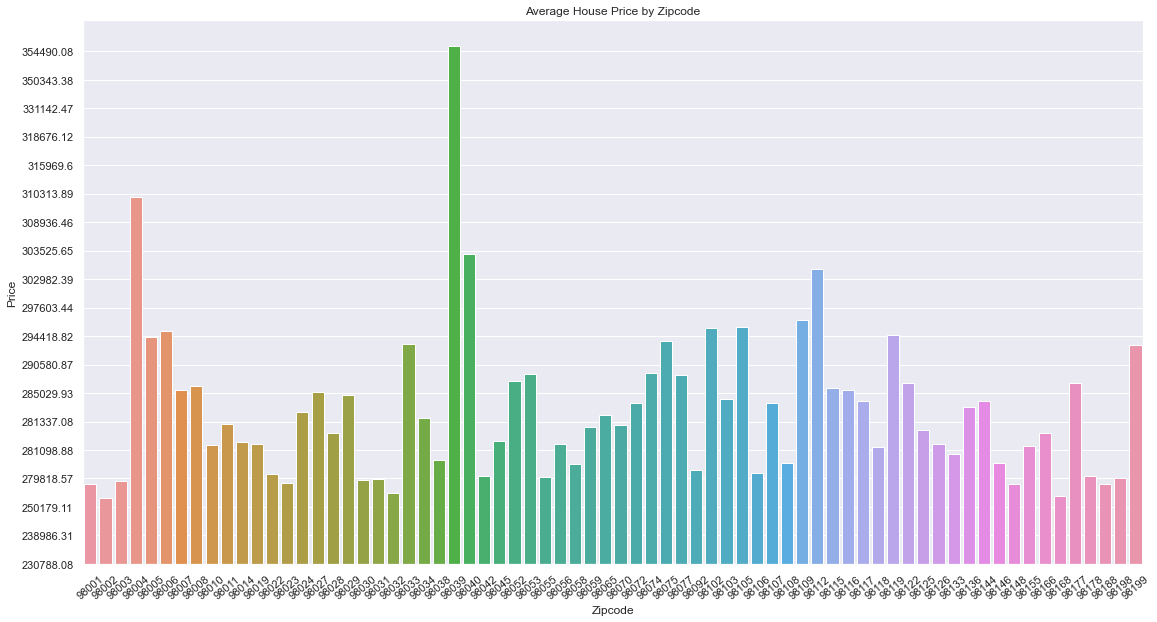

In [302]:
price_by_zipcode=pd.DataFrame([])
price_by_zipcode['zipcode']=pd.concat([kc_new2.groupby(['zipcode'])['price'].mean()]).index
price_by_zipcode=price_by_zipcode.set_index('zipcode')
price_by_zipcode['price']=pd.concat([kc_new2.groupby(['zipcode'])['price'].mean()]).values

plot=plt.figure(figsize=(19,10))
zip_price=sns.barplot(x=price_by_zipcode.index,y=price_by_zipcode['price'])
zip_price.set_xticklabels(labels=price_by_zipcode.index, rotation=40)
zip_price.set_yticklabels(labels=round(price_by_zipcode['price'].sort_values(),2))
zip_price.set_yticks(price_by_zipcode['price'])
plt.yticks(np.arange(0,price_by_zipcode['price'].max(), 100000))
zip_price.set(title='Average House Price by Zipcode',xlabel='Zipcode',ylabel='Price')

### Model Check

Using the Mean Absolute Error, determining how accurate the model is in portraying the housing prices in King County

In [330]:
lr=LinearRegression()
predictors=kc_new2.drop(['price'],axis=1)
predictors=sm.add_constant(predictors)

X_train, X_test, y_train, y_test = train_test_split(predictors,kc_new2['price'], test_size=.5, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10530, 10), (10531, 10), (10530,), (10531,))

In [331]:
lr.fit(X_train,y_train)

yhat_train=lr.predict(X_train)
yhat_test=lr.predict(X_test)

In [336]:
mae=mean_absolute_error
mae(yhat_train,np.delete(yhat_test,0))

272470.3814412837

Using the Mean Absolute Error, we are able to determine that the model has an mean absolute error of $272,470.38.

### Multicollinearity Check

The model has some multicollinearity. First between the categorical variables and another between the number of bathrooms and the sqft_living, but that is to be expected. In this model, because the number of bathrooms as well as the sqft_living space is both important in determining the appropriate housing for the clients, neither variables will not be taken out.

In [15]:
abs(predictors.corr()) >.75

,bedrooms,bathrooms,sqft_living,sqft_lot
bedrooms,True,False,False,False
bathrooms,False,True,False,False
sqft_living,False,False,True,False
sqft_lot,False,False,False,True


In [16]:
kc_pred=kc_fin2.drop(['price'],axis=1)
pred_df=kc_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
pred_df['pairs'] = list(zip(pred_df.level_0, pred_df.level_1))

# set index to pairs
pred_df.set_index(['pairs'], inplace = True)

#d rop level columns
pred_df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
pred_df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
pred_df.drop_duplicates(inplace=True)

In [17]:
pred_df[(pred_df.cc>.75) & (pred_df.cc <1)]

,cc
pairs,


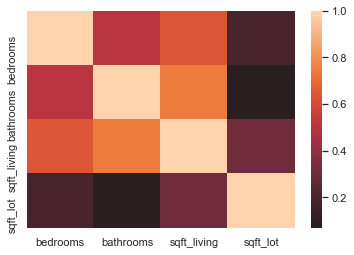

In [18]:
sns.heatmap(predictors.corr(), center=0);

# Linear Regression Assumptions

Proving that the assumptions regarding regression is met using the linear regression model above

## Linearity
The scatter plot of the independent variables to the dependent variables show that they have a linear relationship, meeting the linearity assumption. The scatter plots also show that the data is homoscedastic, meeting two of the three assumptions.

<ipython-input-155-e9201948cb2f>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_beds.set_yticklabels(data['price'])


[Text(0.5, 0, 'Number of Bedrooms'),
 Text(0, 0.5, 'Price'),
 Text(0.5, 1.0, 'Relationship between Price and the Number of Bedrooms')]

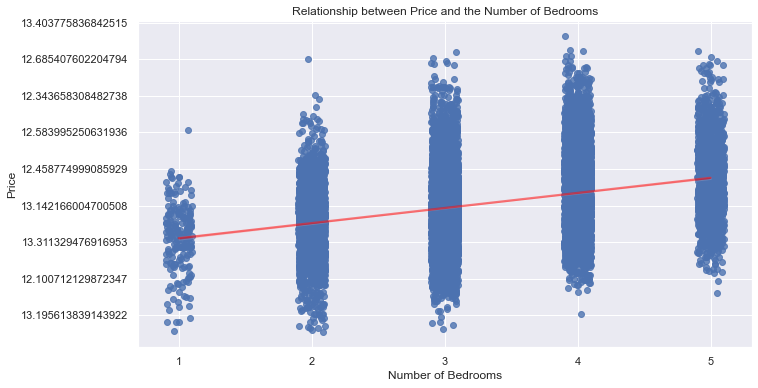

In [155]:
data=kc_fin2
price_unlog=round(np.exp(data['price']),2)
plot=plt.figure(figsize=(11,6))
ax_beds=sns.regplot(x='bedrooms',y='price',data=data,x_jitter=.1, line_kws={'color':'red','alpha':.5})
ax_beds.set_yticklabels(data['price'])
ax_beds.set(xlabel='Number of Bedrooms',ylabel='Price',title='Relationship between Price and the Number of Bedrooms')

<ipython-input-154-89b9a090d37b>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_baths.set_yticklabels(data['price'])


[Text(0.5, 0, 'Number of Bathrooms'),
 Text(0, 0.5, 'Price'),
 Text(0.5, 1.0, 'Relationship between Price and the Number of Bathrooms')]

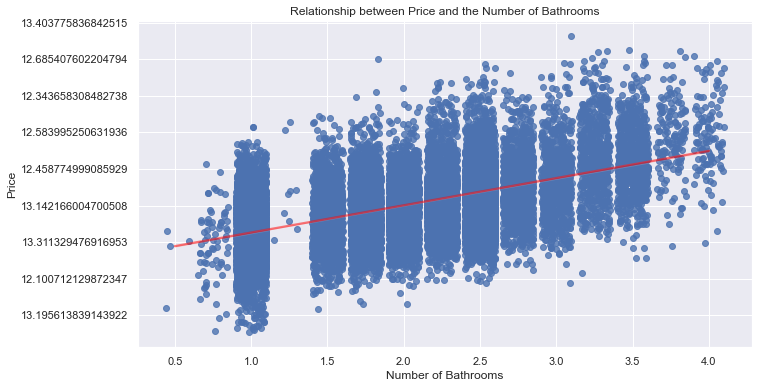

In [154]:
plot=plt.figure(figsize=(11,6))

ax_baths=sns.regplot(x='bathrooms',y='price',data=data,x_jitter=.1, line_kws={'color':'red','alpha':.5})
ax_baths.set_yticklabels(data['price'])
ax_baths.set(xlabel='Number of Bathrooms',ylabel='Price',title='Relationship between Price and the Number of Bathrooms')

[Text(0.5, 0, 'Size of Living Space in Sq. ft.'),
 Text(0, 0.5, 'Price'),
 Text(0.5, 1.0, 'Relationship between Price and the Sq. ft of Living Space')]

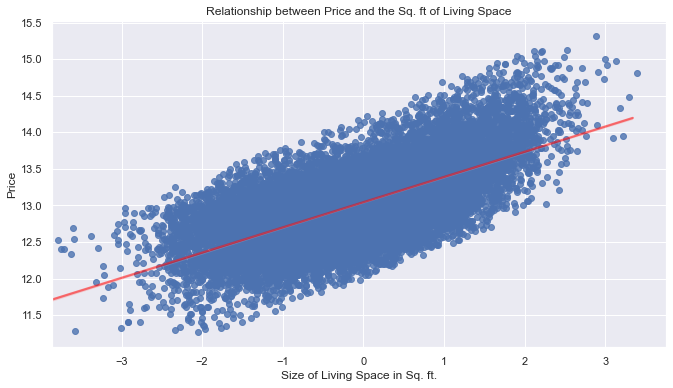

In [127]:
living_unlog=round(np.exp(logsqft_living),3)
data2=kc_fin2
plot=plt.figure(figsize=(11,6))
ax_living=sns.regplot(x='sqft_living',y='price',data=data2,x_jitter=.1, line_kws={'color':'red','alpha':.5})
# ax_living.set_yticklabels(price_unlog)
# ax_living.set_xticklabels('sqft_living')
ax_living.set(xlabel='Size of Living Space in Sq. ft.',ylabel='Price',title='Relationship between Price and the Sq. ft of Living Space')

While we may assume heteroscedasticity for the sqft_lot, this is because there are many apartments meaning many of these houses have 0 sqft_lot. The price difference between apartments varies significantly depending on location, sqft of living space, commodities, and etc. If we overlook the top and bottom part of the scatter plot where sqft_lot is near 0, the rest of the plot is very linear.

<ipython-input-156-2dd6b37ff589>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_lot.set_yticklabels(data['price'])


[Text(0.5, 0, 'Size of Lot Space'),
 Text(0, 0.5, 'Price'),
 Text(0.5, 1.0, 'Relationship between Price and the Sq. ft of Lot Space')]

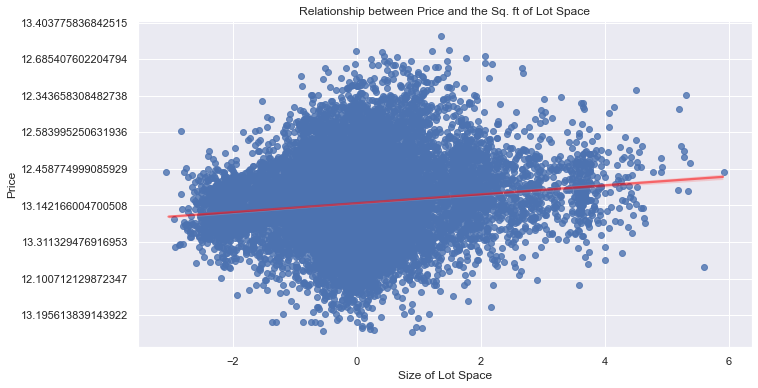

In [156]:
plot=plt.figure(figsize=(11,6))
data2=kc_fin2
ax_lot=sns.regplot(x='sqft_lot',y='price',data=data2,x_jitter=.1, line_kws={'color':'red','alpha':.5})
ax_lot.set_yticklabels(data['price'])
# ax_lot.set_xticklabels('sqft_lot')
ax_lot.set(xlabel='Size of Lot Space',ylabel='Price',title='Relationship between Price and the Sq. ft of Lot Space')

## Normality

### Q-Q Plot of the residuals

First by building a residuals data frame, I was able to create a Q-Q plot of the residuals using model.resid. The Q-Q plot shows that while it is not perfectly normally distributed, it is quite close.

<br><br>

Without log transforming and normalizing the values, the graphs look like this, however, these graphs do show a relationship between the said independent variable and price with real world values. 

<ipython-input-26-2efe6f26d105>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_beds.set_yticklabels(price_unlog)


[Text(0.5, 0, 'Number of Bedrooms'),
 Text(0, 0.5, 'Price'),
 Text(0.5, 1.0, 'Relationship between Price and the Number of Bedrooms')]

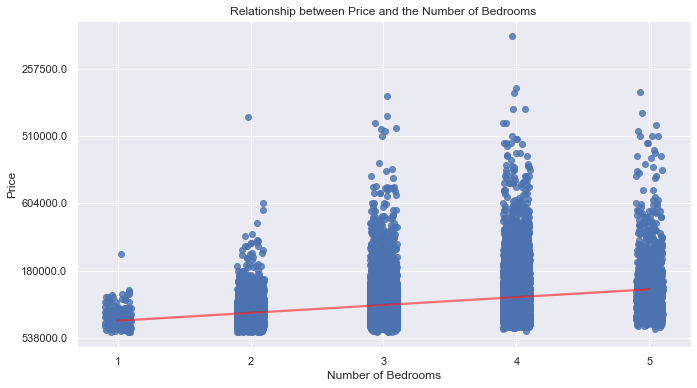

In [26]:
data=kc_fin2
price_unlog=round(np.exp(data['price']),2)
plot=plt.figure(figsize=(11,6))
ax_beds=sns.regplot(x='bedrooms',y=price_unlog,data=data,x_jitter=.1, line_kws={'color':'red','alpha':.5})
ax_beds.set_yticklabels(price_unlog)
ax_beds.set(xlabel='Number of Bedrooms',ylabel='Price',title='Relationship between Price and the Number of Bedrooms')

<ipython-input-27-2f9281687dbc>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_baths.set_yticklabels(price_unlog)


[Text(0.5, 0, 'Number of Bathrooms'),
 Text(0, 0.5, 'Price'),
 Text(0.5, 1.0, 'Relationship between Price and the Number of Bathrooms')]

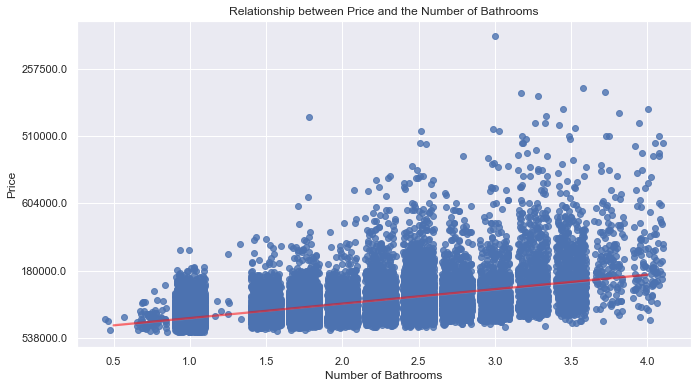

In [27]:
plot=plt.figure(figsize=(11,6))

ax_baths=sns.regplot(x='bathrooms',y=price_unlog,data=data,x_jitter=.1, line_kws={'color':'red','alpha':.5})
ax_baths.set_yticklabels(price_unlog)
ax_baths.set(xlabel='Number of Bathrooms',ylabel='Price',title='Relationship between Price and the Number of Bathrooms')

<ipython-input-115-87e78f0cf0b1>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_living.set_yticklabels(price_unlog)
<ipython-input-115-87e78f0cf0b1>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_living.set_xticklabels(data2['living'].sort_values())


[Text(0.5, 0, 'Size of Living Space in Sq. ft.'),
 Text(0, 0.5, 'Price'),
 Text(0.5, 1.0, 'Relationship between Price and the Sq. ft of Living Space')]

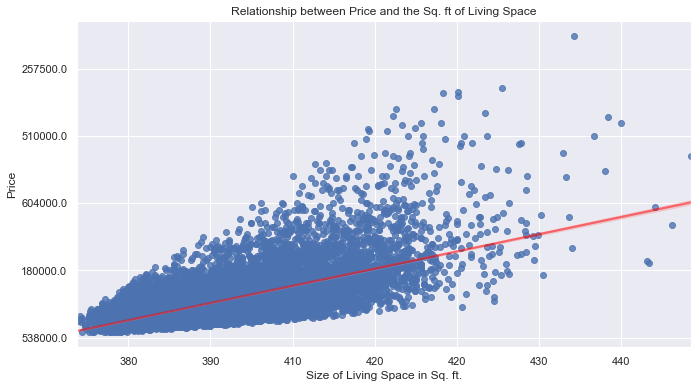

In [115]:
living_unlog=round(np.exp(logsqft_living),3)
data2=kc_unlog
plot=plt.figure(figsize=(11,6))
ax_living=sns.regplot(x=data2['living'],y=price_unlog,data=data2,x_jitter=.1, line_kws={'color':'red','alpha':.5})
ax_living.set_yticklabels(price_unlog)
ax_living.set_xticklabels(data2['living'].sort_values())
ax_living.set(xlabel='Size of Living Space in Sq. ft.',ylabel='Price',title='Relationship between Price and the Sq. ft of Living Space')

<ipython-input-116-206411a9fec9>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_lot.set_yticklabels(price_unlog)
<ipython-input-116-206411a9fec9>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_lot.set_xticklabels(data2['lot'].sort_values())


[Text(0.5, 0, 'Size of Lot Space'),
 Text(0, 0.5, 'Price'),
 Text(0.5, 1.0, 'Relationship between Price and the Sq. ft of Lot Space')]

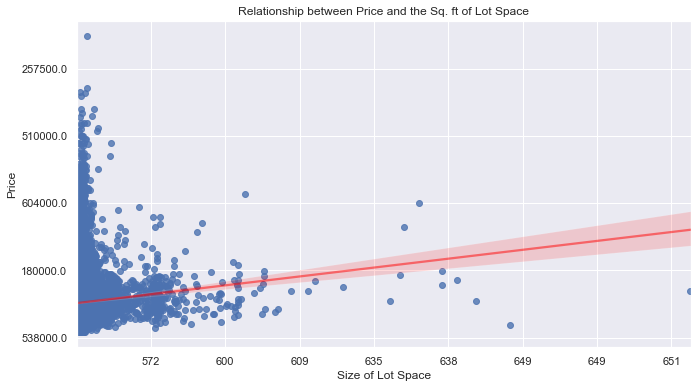

In [116]:
plot=plt.figure(figsize=(11,6))
data2=kc_unlog
ax_lot=sns.regplot(x=data2['lot'],y=price_unlog,data=data2,x_jitter=.1, line_kws={'color':'red','alpha':.5})
ax_lot.set_yticklabels(price_unlog)
ax_lot.set_xticklabels(data2['lot'].sort_values())
ax_lot.set(xlabel='Size of Lot Space',ylabel='Price',title='Relationship between Price and the Sq. ft of Lot Space')

In [297]:
residual_df=pd.DataFrame(sorted(model.resid), columns=['residual'])

In [298]:
residual_df['z_actual']=(residual_df['residual'].map 
                         (lambda x: (x-residual_df['residual'].mean())/residual_df['residual'].std()))
residual_df['rank']=residual_df.index+1
residual_df['percentile']=residual_df['rank'].map(lambda x: x/len(residual_df.residual))
residual_df['theo']=stats.norm.ppf(residual_df['percentile'])
residual_df['error']=residual_df['z_actual']-residual_df['theo']

residual_df.head()

,residual,z_actual,rank,percentile,theo,error
0,-1.163943,-3.081664,1,0.000046,-3.909181,0.827516
1,-1.120740,-2.967281,2,0.000093,-3.738367,0.771086
2,-1.100164,-2.912804,3,0.000139,-3.635140,0.722337
3,-1.094431,-2.897625,4,0.000185,-3.560295,0.662670
4,-1.084504,-2.871343,5,0.000232,-3.501269,0.629926


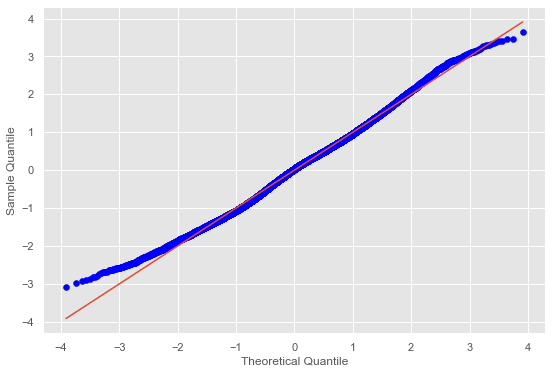

In [299]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(9,6))
    plt.scatter(residual_df['theo'],residual_df['z_actual'],color='blue')
    plt.xlabel('Theoretical Quantile')
    plt.ylabel('Sample Quantile')
    plt.plot(residual_df['theo'],residual_df['theo'])

Rechecking normality. While it does seem less normal than before, the model does not seem to be over or underfitting.

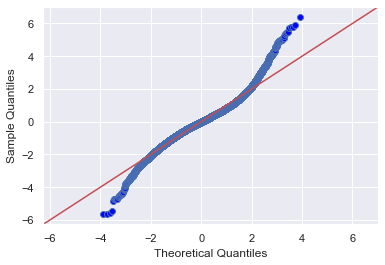

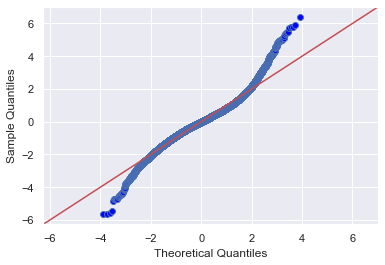

In [305]:
sm.graphics.qqplot(model_fin.resid, dist=stats.norm, line='45', fit=True)

### Histogram of Residuals 

Like the Q-Q plots, the histogram of the residuals also shows that the data is nearly normally distributed. 


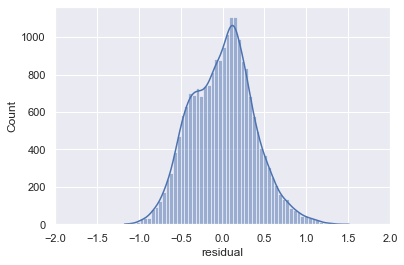

In [148]:
sns.histplot(residual_df['residual'],bins=60, kde=True, cbar=True)
plt.xlim((-2,2))
plt.show()

### Visualizing Error Terms

This section has a better visual representation of the linearity and homoscedasticity of the data. 

 - The Y and Fitted vs. X graph plots the dependent variable against our predicted values with a confidence interval. The positive relationship shows that independent varible and price are correlated, i.e., when one variable increases the other increases.

 - The Residuals versus height graph shows our model's errors versus the specified predictor variable. Each dot is an observed value; the line represents the mean of those observed values. If there's no pattern in the distance between the dots and the mean value, the OLS assumption of homoskedasticity holds.

 - The Partial regression plot shows the relationship between the independent variable and price, taking in to account the impact of adding other independent variables on our existing  coefficient. 

 - The Component and Component Plus Residual (CCPR) plot is an extension of the partial regression plot. It shows where the trend line would lie after adding the impact of adding our other independent variables on the price.

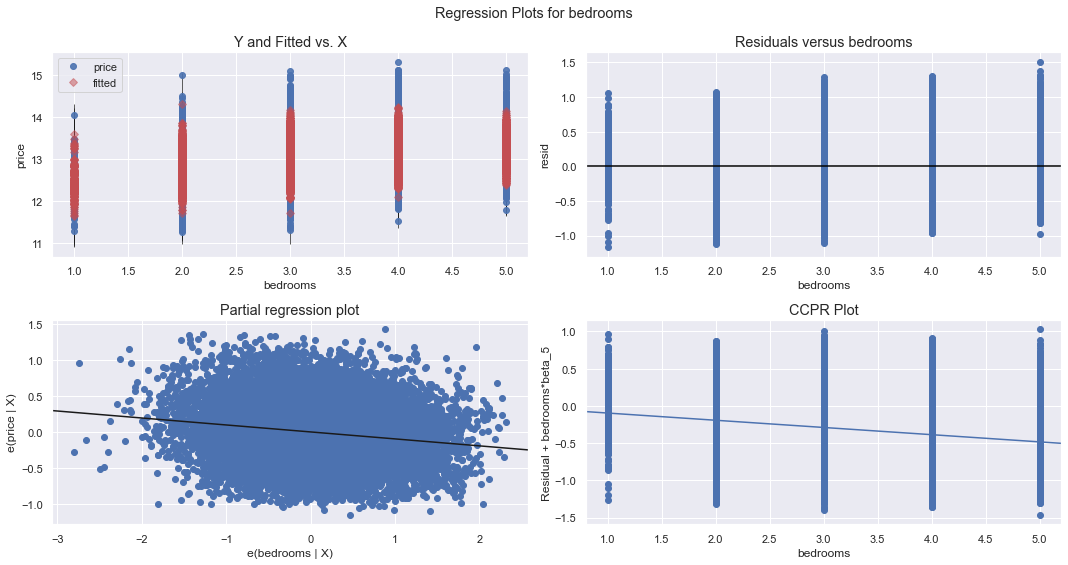

In [149]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "bedrooms", fig=fig)
plt.show()

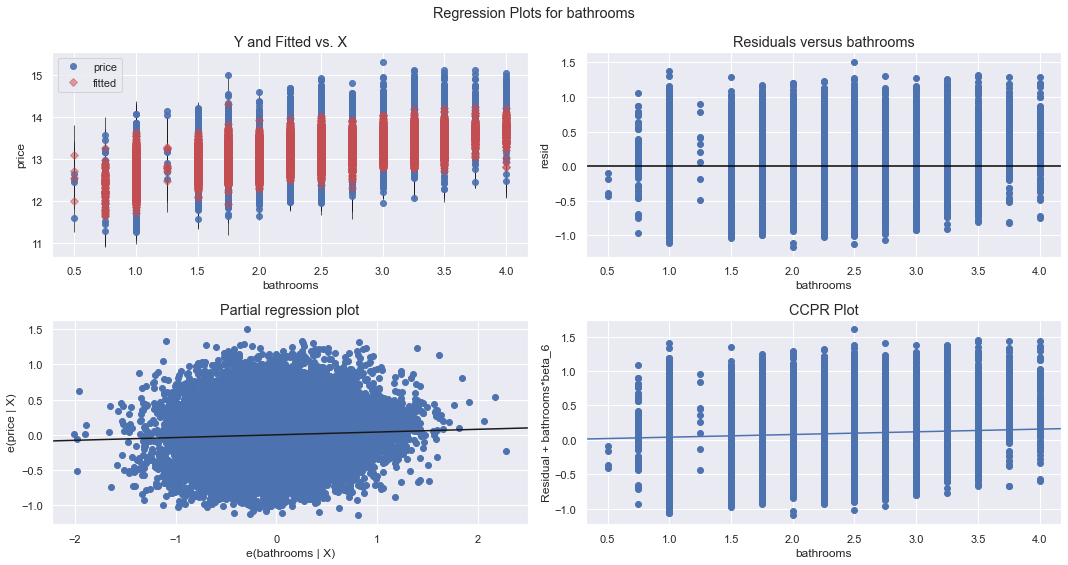

In [150]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "bathrooms", fig=fig)
plt.show()

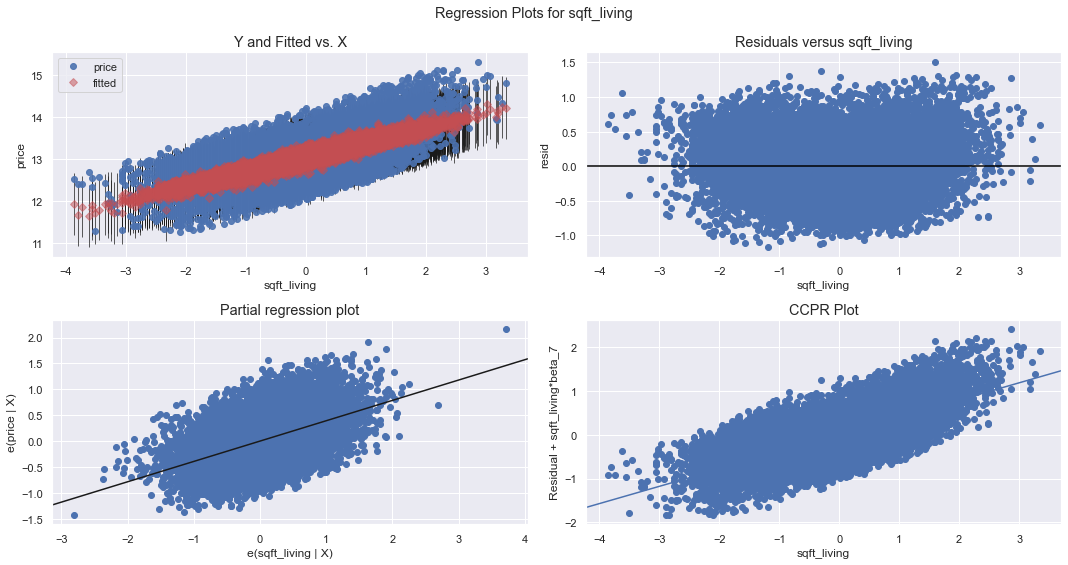

In [151]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig)
plt.show()

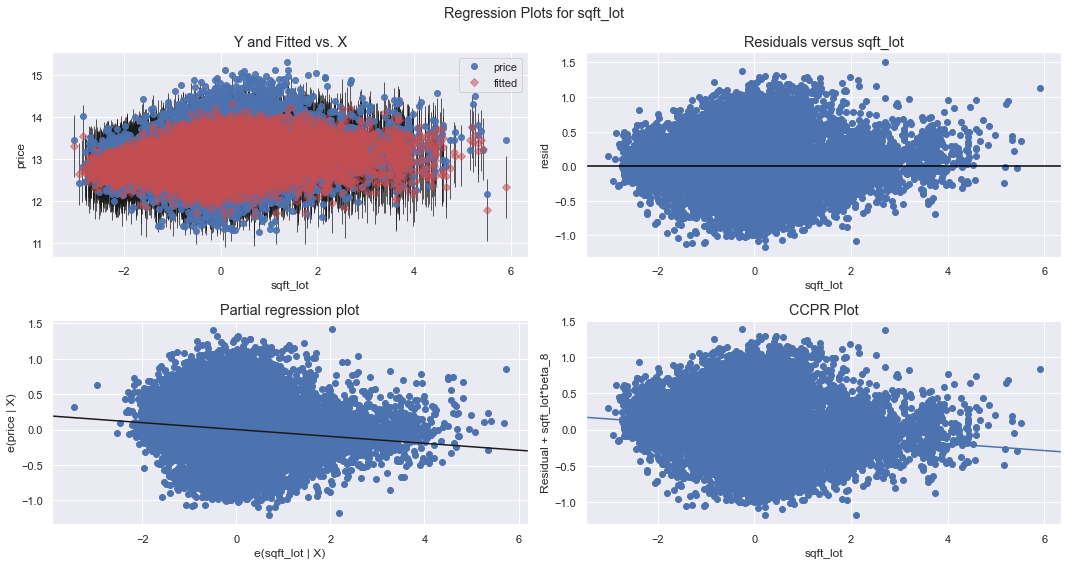

In [152]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_lot", fig=fig)
plt.show()

# Evaluation

By taking bedrooms, bathrooms, size of living space and lot, and the zipcodes, I believe I was able to portray housing prices in King County well. While zipcode had been ignored at start, the price differences between houses of similar specs could not be explained very well, but with the introduction of zip codes, I realized that much of the price difference had been caused by location. 

 - Because the variable zip codes was categorical, it could not be graphed like condition; however, after observing the mean housing price by zip codes, it was very apparant that zip code played a much bigger role in price determination. <br><br>
 
 - Because apartments/condos account for higher prices for houses with a lot size of 0(or other very small number), and thus explains the negative relationship between price and lot size.<br><br>
 

# Conclusion

The biggest challenges were first, trying to figure out why the relationship between lot size and number of bedrooms to the price were negative, and much effort was put into trying to make the coefficients be positive in the model. Realizing that area played an important role in determining housing price was very important as it allowed me to view zip codes as a necessary independent variable. While not having much information regarding the actual geographical location of each area as well as other amenities of each zip code may hinder in providing the best recommendation, knowing that each zip code has different price ranges will help narrowing down potential housing for the clients. 
<br>

 - Organize and categorize different zip codes with housing price range and amenities such as public education, transportation, and other facilities in order to facilitate faster and more suitable recommendations.<br><br>
 - Start oragnizing advertisements targeted to those that are looking to move to the King County area to gain possible clients. <br><br>
 - In the future, having a better understanding of the local traffic, local shopping/food/activities areas, and other factors that clients are looking for in their new neighborhood, would be able to create more fitted lists for the clients. <br><br>
 - Locate houses that are less expensive than those in its neighborhood and are in areas (zip codes) with higher average house price due to a lower condition or etc. <br><br>
 - Using the lot size variable, determine if the housing is an apartment/condo, a town house, or a suburban house. <br><br>
 - When showing possible candidates, show the price of each sq. ft of living space compared to that of zip code average to help  the clients determine the price level of the house.<br>